In [1]:
import sys
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sys.path.append(os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath('"Top 10 Funds by AUM Positioning - Data Gen.ipynb"')))))
sys.path.append(os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath('"Top 10 Funds by AUM Positioning - Data Gen.ipynb"')))))

In [2]:
df = pd.read_pickle('../../data/Index Constituents/universe_with_char.pkl')

In [3]:
df = df.reset_index()
df['date'] = pd.to_datetime(df['date'])
df= df.set_index(['ticker','date'])
test = df[['R.3000','R.1000']]
df=df.join(test.unstack(0).apply(lambda x: x > x.shift()).astype(int).stack(),rsuffix = '_c_flag',how='left')
df

,,R.1000,R.3000,market_val,tret_1mf,tret_3mf,tret_12mf,tret_36mf,fcf_yld,div_yld,ocf_yld,int_burden,cfroic,res_mom_252d,R.3000_c_flag,R.1000_c_flag
ticker,date,,,,,,,,,,,,,,,
MCS,2009-12-31,0.0,1.0,382.061590,-12.129500,1.98908,6.16225,14.3526,6.009788,2.652106,14.925507,0.637352,9.851684,-34.477894,0,0
CTAS,2009-12-31,1.0,1.0,4034.212904,-3.682390,9.62793,10.97050,65.1323,11.282176,1.802839,14.555460,0.867707,18.235136,-7.523244,0,0
HAR,2009-12-31,1.0,1.0,2487.978998,0.765312,32.59640,31.23580,28.3730,-2.286053,0.000000,0.200363,1.051336,0.316190,27.344970,0,0
BANF,2009-12-31,0.0,1.0,572.332240,8.801290,13.76890,13.79590,22.7862,7.689700,2.483801,9.535072,0.958812,12.246225,-38.856070,0,0
LANC,2009-12-31,0.0,1.0,1405.782887,9.802730,19.28340,17.61270,57.4678,10.565490,2.415459,11.248692,0.995540,38.127056,30.842705,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NERV,2019-12-31,0.0,1.0,298.151006,14.346000,-15.33050,-67.08860,-97.2046,-14.028300,0.000000,-14.028302,1.000000,-49.587368,-28.616869,0,0
ABEO,2019-12-31,0.0,1.0,267.833866,-33.639100,-35.77980,-51.98780,-96.2324,-17.722467,0.000000,-14.334768,1.000000,-25.718822,-67.350150,0,0
ADEA,2019-12-31,0.0,1.0,918.429192,-13.027000,-23.72970,15.67570,19.3036,17.730132,4.324325,18.698728,0.485942,16.722656,-29.848188,0,0


In [4]:
df = df.join(df['R.1000_c_flag'].unstack(0).shift(-1).stack().rename('R.1000'),how = 'left',rsuffix='_c_l1_flag')
df

,,R.1000,R.3000,market_val,tret_1mf,tret_3mf,tret_12mf,tret_36mf,fcf_yld,div_yld,ocf_yld,int_burden,cfroic,res_mom_252d,R.3000_c_flag,R.1000_c_flag,R.1000_c_l1_flag
ticker,date,,,,,,,,,,,,,,,,
MCS,2009-12-31,0.0,1.0,382.061590,-12.129500,1.98908,6.16225,14.3526,6.009788,2.652106,14.925507,0.637352,9.851684,-34.477894,0,0,0.0
CTAS,2009-12-31,1.0,1.0,4034.212904,-3.682390,9.62793,10.97050,65.1323,11.282176,1.802839,14.555460,0.867707,18.235136,-7.523244,0,0,0.0
HAR,2009-12-31,1.0,1.0,2487.978998,0.765312,32.59640,31.23580,28.3730,-2.286053,0.000000,0.200363,1.051336,0.316190,27.344970,0,0,0.0
BANF,2009-12-31,0.0,1.0,572.332240,8.801290,13.76890,13.79590,22.7862,7.689700,2.483801,9.535072,0.958812,12.246225,-38.856070,0,0,0.0
LANC,2009-12-31,0.0,1.0,1405.782887,9.802730,19.28340,17.61270,57.4678,10.565490,2.415459,11.248692,0.995540,38.127056,30.842705,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NERV,2019-12-31,0.0,1.0,298.151006,14.346000,-15.33050,-67.08860,-97.2046,-14.028300,0.000000,-14.028302,1.000000,-49.587368,-28.616869,0,0,NaN
ABEO,2019-12-31,0.0,1.0,267.833866,-33.639100,-35.77980,-51.98780,-96.2324,-17.722467,0.000000,-14.334768,1.000000,-25.718822,-67.350150,0,0,NaN
ADEA,2019-12-31,0.0,1.0,918.429192,-13.027000,-23.72970,15.67570,19.3036,17.730132,4.324325,18.698728,0.485942,16.722656,-29.848188,0,0,NaN


In [5]:
df = df.drop(columns =['R.3000','tret_1mf','tret_3mf','tret_12mf','tret_36mf','R.3000_c_flag','R.1000_c_flag','R.1000'])
df

,,market_val,fcf_yld,div_yld,ocf_yld,int_burden,cfroic,res_mom_252d,R.1000_c_l1_flag
ticker,date,,,,,,,,
MCS,2009-12-31,382.061590,6.009788,2.652106,14.925507,0.637352,9.851684,-34.477894,0.0
CTAS,2009-12-31,4034.212904,11.282176,1.802839,14.555460,0.867707,18.235136,-7.523244,0.0
HAR,2009-12-31,2487.978998,-2.286053,0.000000,0.200363,1.051336,0.316190,27.344970,0.0
BANF,2009-12-31,572.332240,7.689700,2.483801,9.535072,0.958812,12.246225,-38.856070,0.0
LANC,2009-12-31,1405.782887,10.565490,2.415459,11.248692,0.995540,38.127056,30.842705,0.0
...,...,...,...,...,...,...,...,...,...
NERV,2019-12-31,298.151006,-14.028300,0.000000,-14.028302,1.000000,-49.587368,-28.616869,NaN
ABEO,2019-12-31,267.833866,-17.722467,0.000000,-14.334768,1.000000,-25.718822,-67.350150,NaN
ADEA,2019-12-31,918.429192,17.730132,4.324325,18.698728,0.485942,16.722656,-29.848188,NaN


In [6]:
df = df.dropna()
df['market_val'] = df['market_val'].unstack().rank(method='min',ascending= False).stack()
df

C:\Users\nurciuoli\AppData\Local\Temp\5\ipykernel_30256\689933617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['market_val'] = df['market_val'].unstack().rank(method='min',ascending= False).stack()


,,market_val,fcf_yld,div_yld,ocf_yld,int_burden,cfroic,res_mom_252d,R.1000_c_l1_flag
ticker,date,,,,,,,,
MCS,2009-12-31,1962.0,6.009788,2.652106,14.925507,0.637352,9.851684,-34.477894,0.0
CTAS,2009-12-31,492.0,11.282176,1.802839,14.555460,0.867707,18.235136,-7.523244,0.0
HAR,2009-12-31,733.0,-2.286053,0.000000,0.200363,1.051336,0.316190,27.344970,0.0
BANF,2009-12-31,1661.0,7.689700,2.483801,9.535072,0.958812,12.246225,-38.856070,0.0
LANC,2009-12-31,1059.0,10.565490,2.415459,11.248692,0.995540,38.127056,30.842705,0.0
...,...,...,...,...,...,...,...,...,...
WBD,2019-11-29,360.0,17.393416,0.000000,18.789259,0.756288,12.707169,-0.470499,0.0
NERV,2019-11-29,2559.0,-15.958594,0.000000,-15.958596,1.000000,-49.587368,-37.096760,0.0
ABEO,2019-11-29,2724.0,-28.049141,0.000000,-22.687470,1.000000,-25.718822,-67.826830,0.0


In [7]:
import pandas as pd

df.iloc[:,1:-1] = df.iloc[:,1:-1].fillna(df.iloc[:,1:-1].mean())

C:\Users\nurciuoli\AppData\Local\Temp\5\ipykernel_30256\2508814874.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:,1:-1] = df.iloc[:,1:-1].fillna(df.iloc[:,1:-1].mean())


In [8]:
from scipy import stats

df.iloc[:,1:-1] = df.iloc[:,1:-1].apply(lambda x: stats.mstats.winsorize(x, limits=[0.05, 0.05]))

C:\Users\nurciuoli\AppData\Local\Temp\5\ipykernel_30256\1869309903.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:,1:-1] = df.iloc[:,1:-1].apply(lambda x: stats.mstats.winsorize(x, limits=[0.05, 0.05]))


In [9]:
df.iloc[:,1:-1] = df.iloc[:,1:-1].apply(stats.zscore)

C:\Users\nurciuoli\AppData\Local\Temp\5\ipykernel_30256\159410078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:,1:-1] = df.iloc[:,1:-1].apply(stats.zscore)


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Specify target variable name
target = 'R.1000_c_l1_flag'

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(target, 1), 
    df[target], 
    test_size=0.2, 
    random_state=42)

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Making predictions
y_pred = logreg.predict(X_test)

# Checking the accuracy of the model
print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred))


from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf = RandomForestClassifier(max_depth = 10)
rf.fit(X_train, y_train)

# Making predictions
y_pred_rf = rf.predict(X_test)

# Checking the accuracy of the model
print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred_rf))

C:\Users\nurciuoli\AppData\Local\Temp\5\ipykernel_30256\1715096281.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(target, 1),
c:\Users\nurciuoli\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy:  0.9990987263969741
Random Forest Accuracy:  0.9990987263969741


In [12]:
from sklearn.metrics import classification_report

# For Logistic Regression
print("Logistic Regression")
print(classification_report(y_test, y_pred))

# For Random Forest
print("Random Forest")
print(classification_report(y_test, y_pred_rf))

# Show plots
import matplotlib.pyplot as plt
plt.show()

Logistic Regression
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     67621
         1.0       0.00      0.00      0.00        61

    accuracy                           1.00     67682
   macro avg       0.50      0.50      0.50     67682
weighted avg       1.00      1.00      1.00     67682

Random Forest
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     67621
         1.0       0.00      0.00      0.00        61

    accuracy                           1.00     67682
   macro avg       0.50      0.50      0.50     67682
weighted avg       1.00      1.00      1.00     67682



c:\Users\nurciuoli\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nurciuoli\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nurciuoli\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c

C:\Users\nurciuoli\AppData\Local\Temp\5\ipykernel_30256\1804555287.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  feature_names=df.drop(target, 1).columns)


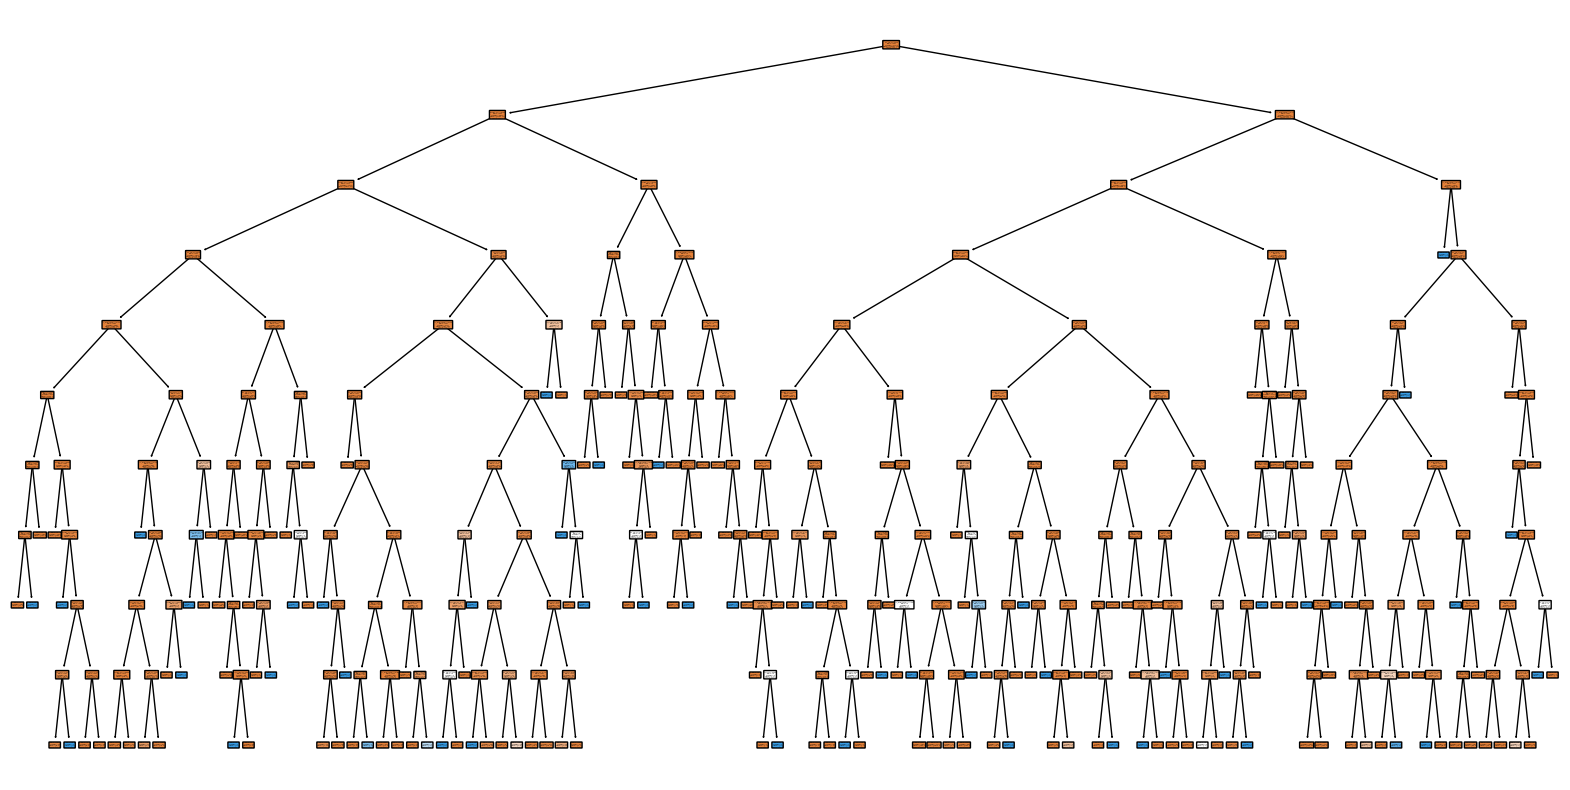

In [13]:
from sklearn.tree import plot_tree

# Select one tree from the forest to visualize
chosen_tree = rf.estimators_[5]

plt.figure(figsize=(20,10))  # Set the figure size
plot_tree(chosen_tree,
          filled=True,
          rounded=True,
          class_names=['class 1', 'class 2'],
          feature_names=df.drop(target, 1).columns) 
plt.show()

C:\Users\nurciuoli\AppData\Local\Temp\5\ipykernel_30256\3971043173.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  rf_s = pd.Series(rf.feature_importances_,index = df.drop(target, 1).columns).sort_values()


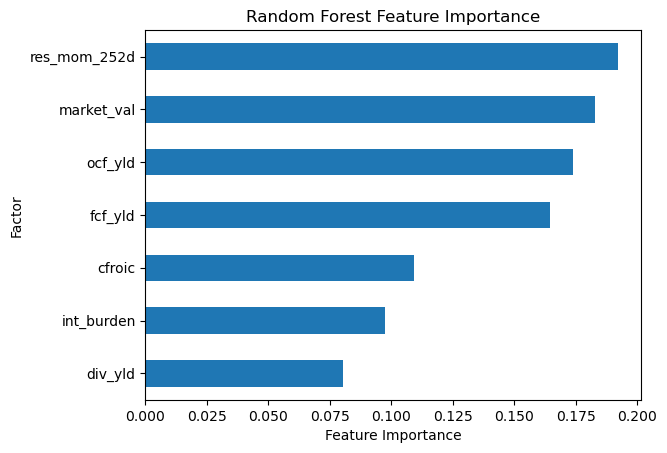

In [14]:
rf_s = pd.Series(rf.feature_importances_,index = df.drop(target, 1).columns).sort_values()

rf_s.plot(kind ='barh')

plt.title('Random Forest Feature Importance')

plt.xlabel('Feature Importance')

plt.ylabel('Factor')

plt.show()

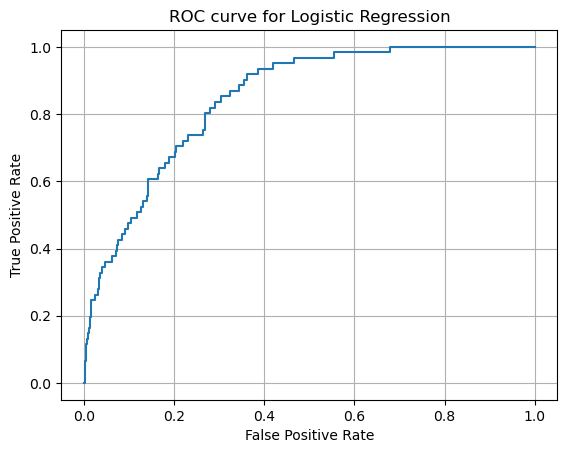

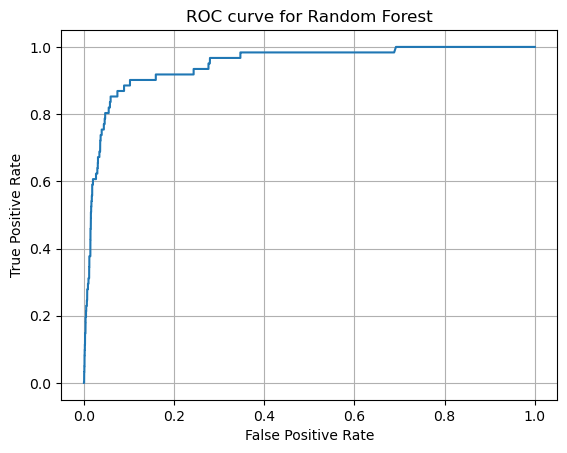

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute predicted probabilities with the logistic regression model
lr_probs = logreg.predict_proba(X_test)[:, 1]
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, lr_probs)
plt.plot(fpr, tpr)
plt.title('ROC curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

# Compute predicted probabilities with the RandomForest model
rf_probs = rf.predict_proba(X_test)[:, 1]
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_probs)
plt.plot(fpr, tpr)
plt.title('ROC curve for Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

In [16]:
# Compute AUC score
lr_auc = roc_auc_score(y_test, lr_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
print('Logistic Regression AUC Score: ', lr_auc)
print('Random Forest AUC Score: ', rf_auc)

Logistic Regression AUC Score:  0.846620544932084
Random Forest AUC Score:  0.9473139952401051


In [22]:
# Define training and testing split
X = df.drop(target, 1).unstack().ffill().stack().dropna()
rfp = rf.predict(X)
df_rfp  =pd.DataFrame(pd.Series(rfp,index = X.index)).rename(columns={0:'rfp'})
df_rfp


C:\Users\nurciuoli\AppData\Local\Temp\5\ipykernel_30256\3063729211.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop(target, 1).unstack().ffill().stack().dropna()


rfp
ticker date           
MCS    2009-12-31  0.0
       2010-01-29  0.0
       2010-02-26  0.0
       2010-03-31  0.0
       2010-04-30  0.0
...                ...
VAPO   2019-07-31  0.0
       2019-08-30  0.0
       2019-09-30  0.0
       2019-10-31  0.0
       2019-11-29  0.0

[607554 rows x 1 columns]

In [23]:
import apis.fpe.myfpe as fpe
path = 'rfp_predictions.csv'
fpe.post_file(path,df_rfp)

'rfp_predictions.csv'